In [1]:
import sys
sys.path.append('../')

In [2]:
from data_loading import ChatHighlightData
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
chd = ChatHighlightData(chat_dir="../data/final_data",
                 highlight_dir="../data/gt",
                 emote_dir="../data/emotes")

In [4]:
chd.load_data(file_identifier="nalcs_w4d3_FOX_TSM_g1")
chd.load_emotes(file_identifier="nalcs_w4d3_FOX_TSM_g1")

In [5]:
chd.get_chat_measure("message_density")

{'nalcs_w4d3_FOX_TSM_g1': array([0, 0, 0, ..., 0, 1, 0])}

In [41]:
chms = ['message_density',
        'emote_density',
        "message_diversity",
        'copypasta_density']

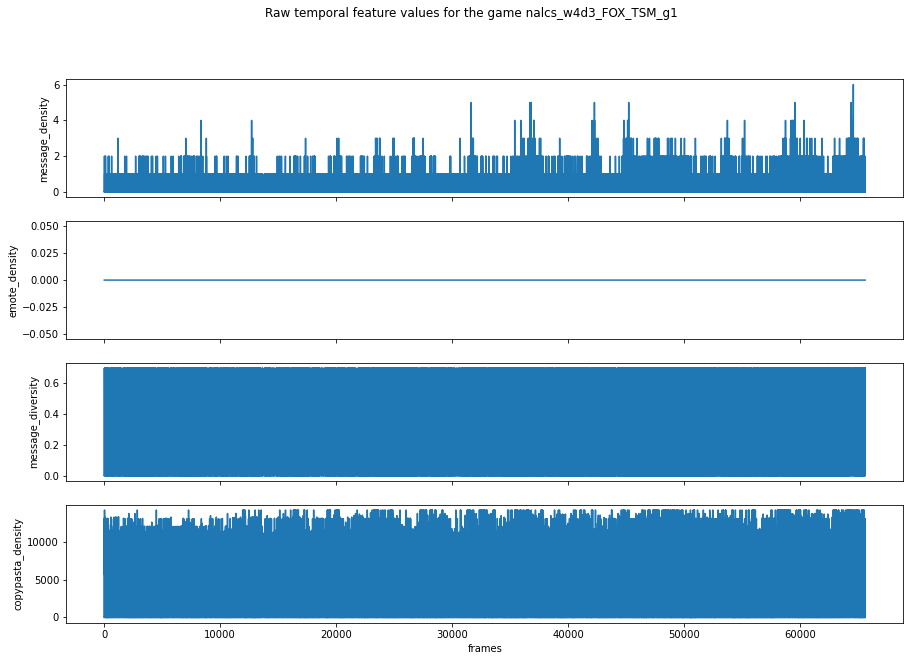

In [48]:
fig, axes = plt.subplots(len(chms), figsize=(15, 10), sharex=True)
fig.suptitle("Raw temporal feature values for the game nalcs_w4d3_FOX_TSM_g1")
#fig.tight_layout(h_pad=2)

for i, m in enumerate(chms):
    chm = list(chd.get_chat_measure(m).values())[0]
    ax = axes[i]
    ax.plot(list(range(len(chm))), chm)
    ax.set_ylabel(m.lower())
    ax.set_ylabel(m.lower())
    if m == "copypasta_density":
        ax.set_xlabel("frames")

In [49]:
fig.savefig("./raw_temp_features_baselines.jpg")